#  UFRN
## Disciplina: Aprendizado Não Supervisionado de Máquinas

##Assunto: Bases de dados e Introdução à PCA

Prof. Luiz Affonso Guedes

PPGEEC - UFRN
2025-2

## Objetivo:
Os objetivos deste nootebook são:
- Apresentar algumas bases de dados disponíveis no Python.
- Introduzir o conceito de distância.
- Introduzir PCA.

##1. Revisão do Notebook Anterior- Interpretação Geométrica


Text(0, 0.5, 'Random Normal Y')

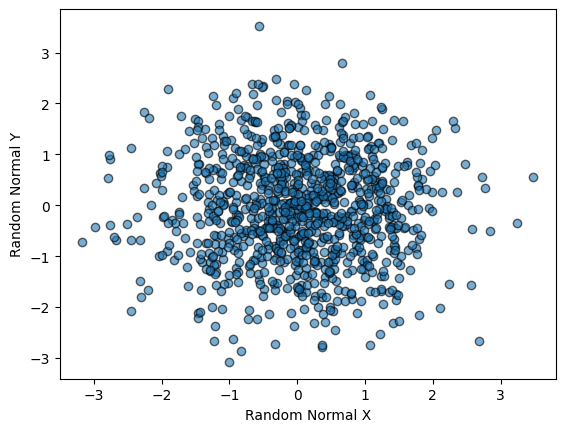

In [ ]:
# Geração de amostras de duas variáveis aleatórias utilizando distribuição Normal univariada.
# Importação de pacotes
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n = 1000

#x = np.random.randn(n)  # usando o pacote numpy
#y = np.random.randn(n)  # usando o pacote numpy

x = stats.norm.rvs(loc=0, scale=1, size=n, random_state=None)   # usando o pacote scipy
y = stats.norm.rvs(loc=0, scale=1, size=n, random_state=None)   # usando o pacote scipy

plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('Random Normal Y')


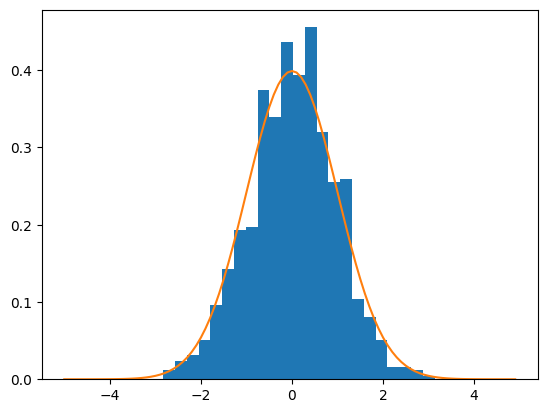

In [ ]:
## Distribuição Normal Multivariada - caso particular univariado
# geração de n pontos/amostras

# Importação de pacotes

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal

n=1000
media = 0
covariancia = 1

amostras = multivariate_normal.rvs(mean=media, cov=covariancia, size=n)
plt.hist(amostras, bins=int(1+3.22*np.log(n)), density=True)

x = np.linspace(-5, 5, 100, endpoint=False)
y = multivariate_normal.pdf(x, mean=media, cov=covariancia);

plt.plot(x, y)

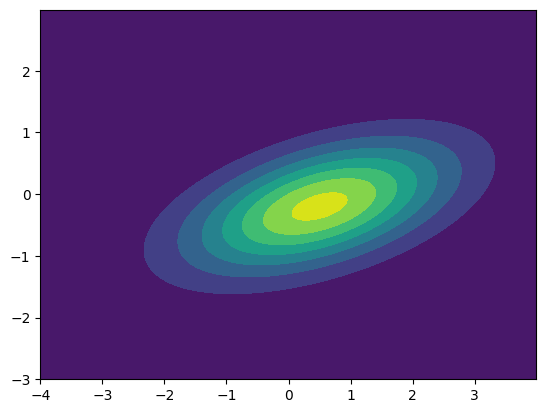

In [ ]:
## Distribuição Normal Multivariada - caso bivariado
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal

x, y = np.mgrid[-4:4:.01, -3:3:.01]

pos = np.dstack((x, y))    # Tranformar em matriz
#pos = np.empty(x.shape + (2,))
#pos[:, :, 0] = x; pos[:, :, 1] = y

pos = np.dstack((x, y))

mediaX = 0.5
mediaY = -0.2

vetMedia = [mediaX, mediaY]
P = [[2.0, 0.5], [0.5, 0.5]]   # Matriz de Covariância

rv = multivariate_normal(vetMedia, P)
plt.contourf(x, y, rv.pdf(pos))

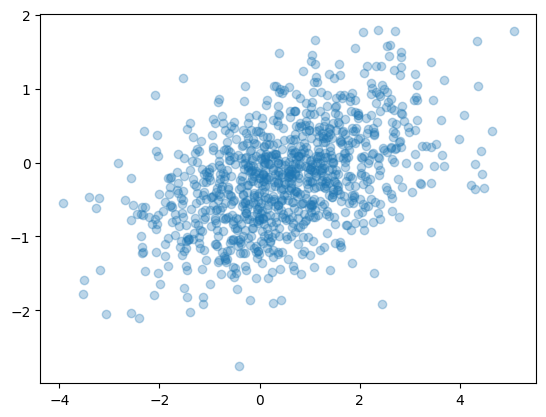

In [ ]:
## Gerando n números numa distribuição Normal Multivariada - caso bivariado
# Assinatura do método --> multivariate_normal.rvs(mean=NonevetMedia, cov=matriz_Covariância, size=n)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal


mediaX = 0.5
mediaY = -0.2

vetMedia = [mediaX, mediaY]
P = [[2.0, 0.5], [0.5, 0.5]]   # Matriz de Covariância

F1 = multivariate_normal(vetMedia, P)    # Geração da função Normal bivariada

n = 1000     # número de amostras

Z1 = F1.rvs(n)      # Geração de n amostras dessa distribuição

alpha = 0.3  # raio dos pontos

plt.scatter(Z1[:,0],Z1[:,1], alpha=alpha)

plt.show()

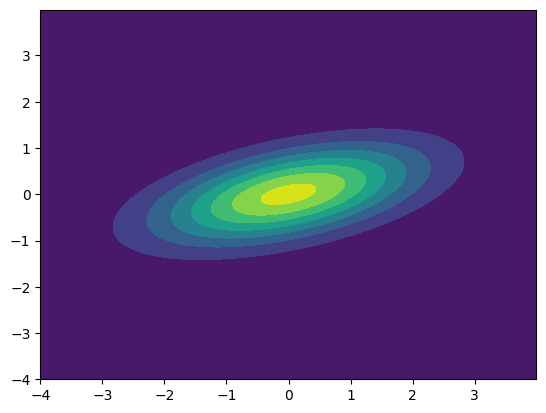

In [ ]:
## Distribuição Normal Multivariada - caso bivariado
# Generalizando o programa

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal

x1, x2 = np.mgrid[-4:4:.01, -4:4:.01]    # será necessário ajusta a escala dos eixos

pos = np.dstack((x1, x2))    # Tranformar em matriz


mediaX1 = 0.0
mediaX2 = 0.0
sigma1 = 2.0
sigma2 = 0.5
ro = 0.5      # o valor entre  -1< ro <+1

vetMedia = [mediaX1, mediaX2]
P = [[sigma1, ro*sigma1*sigma2], [ro*sigma1*sigma2, sigma2]]   # Matriz de Covariância

rv = multivariate_normal(vetMedia, P)
plt.contourf(x1, x2, rv.pdf(pos))

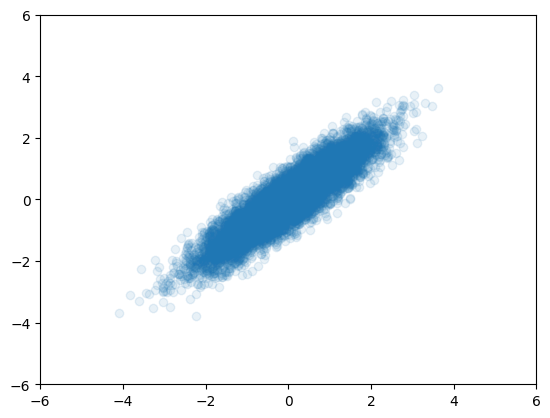

In [ ]:
# Continuação do programa anterior
# Gráfico Scatter - via geração de amostras/pontos bidimensionais

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal

mediaX1 = 0.0
mediaX2 = 0.0
sigma1 = 1.0
sigma2 = 1.0
ro = 0.9     # o valor entre  -1< ro <+1

vetMedia = [mediaX1, mediaX2]
P = [[sigma1, ro*sigma1*sigma2], [ro*sigma1*sigma2, sigma2]]   # Matriz de Covariância

rv = multivariate_normal(vetMedia, P)

n = 10000    # número de amostras

Z1 = rv.rvs(n)      # Geração de n amostras dessa distribuição

alpha = 0.1  # raio dos pontos

x1 = Z1[:,0]
x2 = Z1[:,1]
plt.scatter(x1,x2, alpha=alpha)
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.show()

(array([3.88982787e-04, 7.77965574e-04, 1.16694836e-03, 2.72287951e-03,
        7.39067296e-03, 8.16863853e-03, 2.13940533e-02, 3.57864164e-02,
        6.84609705e-02, 1.11638060e-01, 1.56760063e-01, 2.04215963e-01,
        2.69954054e-01, 3.22855713e-01, 3.73812458e-01, 3.94817529e-01,
        3.81981097e-01, 3.79258217e-01, 2.94848953e-01, 2.79678624e-01,
        2.01882067e-01, 1.48202442e-01, 9.29668861e-02, 6.34041943e-02,
        3.92872615e-02, 1.40033803e-02, 9.33558689e-03, 3.11186230e-03,
        7.77965574e-04, 7.77965574e-04]),
 array([-4.08489902, -3.82781824, -3.57073745, -3.31365667, -3.05657589,
        -2.7994951 , -2.54241432, -2.28533353, -2.02825275, -1.77117196,
        -1.51409118, -1.2570104 , -0.99992961, -0.74284883, -0.48576804,
        -0.22868726,  0.02839353,  0.28547431,  0.54255509,  0.79963588,
         1.05671666,  1.31379745,  1.57087823,  1.82795902,  2.0850398 ,
         2.34212058,  2.59920137,  2.85628215,  3.11336294,  3.37044372,
         3.62752

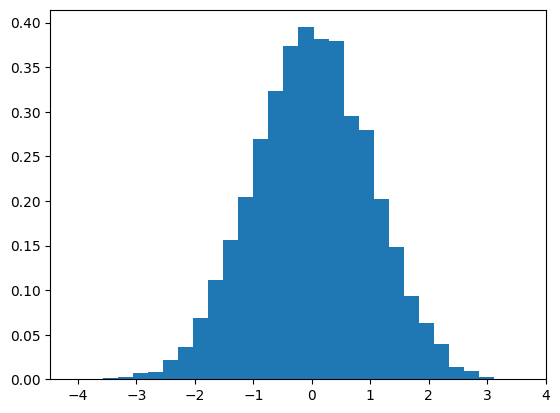

In [ ]:
# Distribuição marginal em x1

plt.hist(x1, bins=int(1+3.22*np.log(n)), density=True)

(array([0.00081029, 0.00162059, 0.00202573, 0.0052669 , 0.01053381,
        0.02471394, 0.03808377, 0.06846976, 0.09520942, 0.14099098,
        0.20257324, 0.24916509, 0.32533262, 0.37800167, 0.39420753,
        0.36139066, 0.36746786, 0.34113334, 0.31236794, 0.2248563 ,
        0.17907474, 0.12154394, 0.08751164, 0.05631536, 0.0340323 ,
        0.01580071, 0.00648234, 0.00445661, 0.00121544, 0.00081029]),
 array([-3.77054002, -3.52371571, -3.2768914 , -3.03006709, -2.78324279,
        -2.53641848, -2.28959417, -2.04276986, -1.79594555, -1.54912124,
        -1.30229693, -1.05547262, -0.80864832, -0.56182401, -0.3149997 ,
        -0.06817539,  0.17864892,  0.42547323,  0.67229754,  0.91912185,
         1.16594615,  1.41277046,  1.65959477,  1.90641908,  2.15324339,
         2.4000677 ,  2.64689201,  2.89371632,  3.14054063,  3.38736493,
         3.63418924]),
 <BarContainer object of 30 artists>)

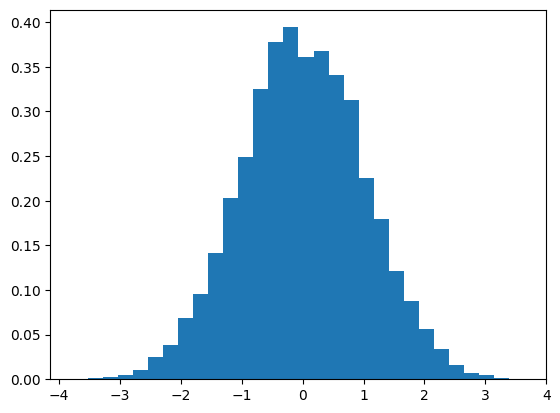

In [ ]:
# Distribuição marginal em x2

plt.hist(x2, bins=int(1+3.22*np.log(n)), density=True)

(-10.0, 10.0)

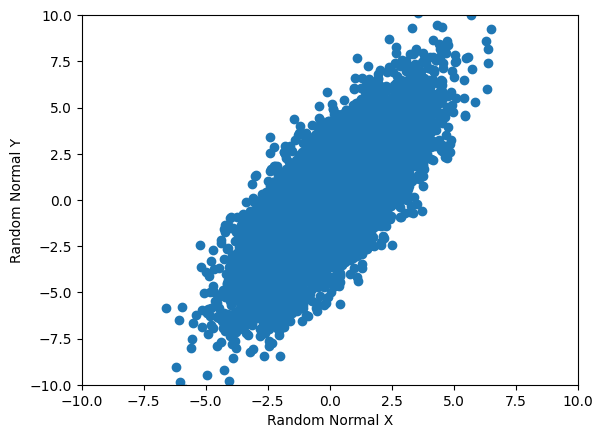

In [ ]:
# Gerando uma distrbuição Normal Bivariada através de duas distribuições Normais univariadas independentes


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n = 10000
mediaX1 = 0.0
mediaX2 = 0.0
sigma1 = 3.0
sigma2 = 1.0

x1 = stats.norm.rvs(loc=mediaX1, scale=sigma1, size=n, random_state=None)   # usando o pacote scipy
y1 = stats.norm.rvs(loc=mediaX2, scale=sigma2, size=n, random_state=None)   # usando o pacote scipy

teta = 60* np.pi/180    # ângulo de rotação em radianos

# Deslocamento após  rotação

dx = 0
dy = 0

x2 = np.cos(teta)*x1 - np.sin(teta)*y1 + dx
y2 = np.sin(teta)*x1 + np.cos(teta)*y1 + dy


plt.scatter(x2, y2)

#plt.scatter(x2, y2, edgecolor='k', alpha=0.1)
plt.xlabel('Random Normal X')
plt.ylabel('Random Normal Y')
plt.xlim(-10, 10)
plt.ylim(-10, 10)


In [ ]:
np.cov(x2,y2)

array([[5.15545124, 4.04928616],
       [4.04928616, 4.94502286]])

(array([0.0004582 , 0.00091641, 0.00091641, 0.00274923, 0.00435294,
        0.01008049, 0.02451392, 0.04100928, 0.05865014, 0.09393186,
        0.11707117, 0.14387612, 0.17251388, 0.21581418, 0.23551696,
        0.23803708, 0.20939932, 0.18671821, 0.15991327, 0.12348603,
        0.09164084, 0.05727553, 0.04444581, 0.02817956, 0.01397523,
        0.00893498, 0.00343653, 0.00137461, 0.00068731, 0.00114551]),
 array([-6.58295233, -6.14646572, -5.70997911, -5.2734925 , -4.83700588,
        -4.40051927, -3.96403266, -3.52754605, -3.09105944, -2.65457283,
        -2.21808622, -1.78159961, -1.345113  , -0.90862638, -0.47213977,
        -0.03565316,  0.40083345,  0.83732006,  1.27380667,  1.71029328,
         2.14677989,  2.58326651,  3.01975312,  3.45623973,  3.89272634,
         4.32921295,  4.76569956,  5.20218617,  5.63867278,  6.07515939,
         6.51164601]),
 <BarContainer object of 30 artists>)

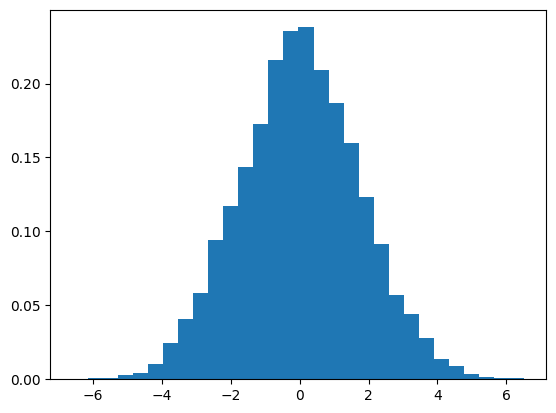

In [ ]:
plt.hist(x2, bins=int(1+3.22*np.log(n)), density=True)

## 2. Algumas Bases de dados em Python


###2.1 - Base de Dados Iris

###2.1.1 - Dataset Iris no Pacote Seaborn

In [ ]:
# Importação de Pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


iris = sns.load_dataset('iris')    # dataset Iris do pacote seaborn
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


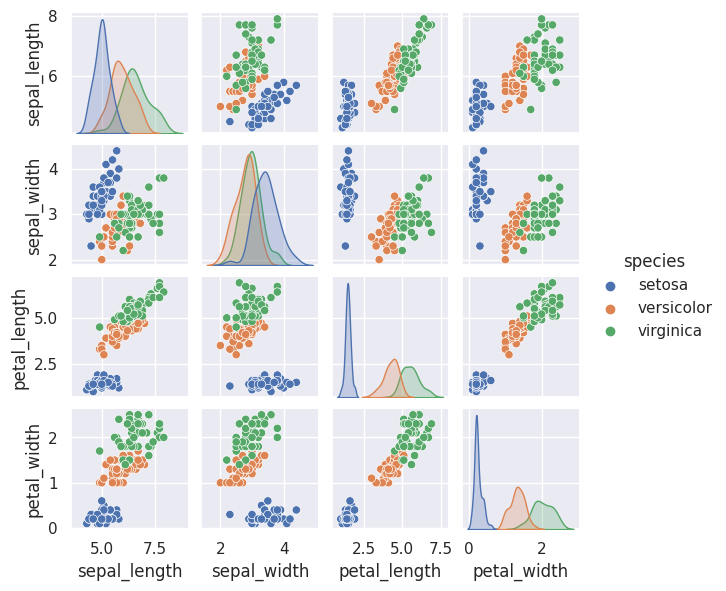

In [ ]:
# Gráfico pairplot

sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [ ]:
# Obtenção da Matriz de características (features)

X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [ ]:
# Obtenção do vetor de objetivos (target)
y_iris = iris['species']
y_iris.shape

(150,)

### 2.1.2 - Base de dados Iris no Pacote SciKitLearn

In [ ]:
# Exemplo de verificação do dataset Iris do pacote Scikit-learn

# Pacote scikitlearn (classe datasets)
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
iris = datasets.load_iris()   # Dataset Iris do Pacote Sklearn
print(type(iris))

print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# Verificação dos tipos dos dados do dataset Iris

print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.data[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 2.2 - Base de Dados Digits do Pacote Sklearn

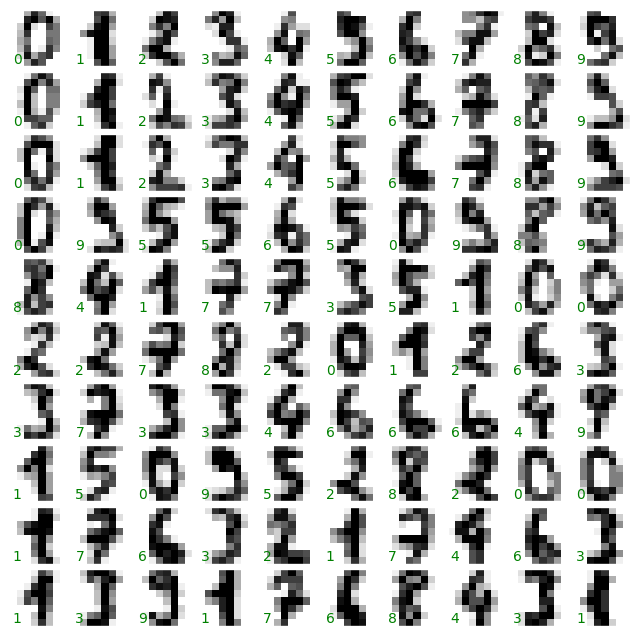

In [ ]:
# Exemplo do dataset Digits

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
X.shape

(1797, 64)

In [ ]:
y = digits.target
y.shape

(1797,)

###2.3- Base de Dados de Câncer

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
X.shape


(569, 30)

In [ ]:
y = cancer.target
y.shape

(569,)

###2.4 - Base de Dados make_blobs do Sklearn

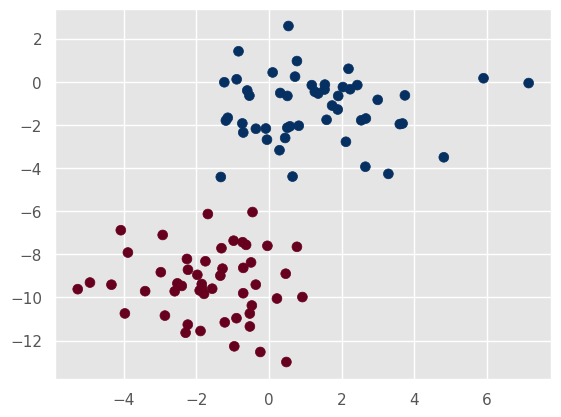

In [ ]:
# Exemplo com 02 clusters

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

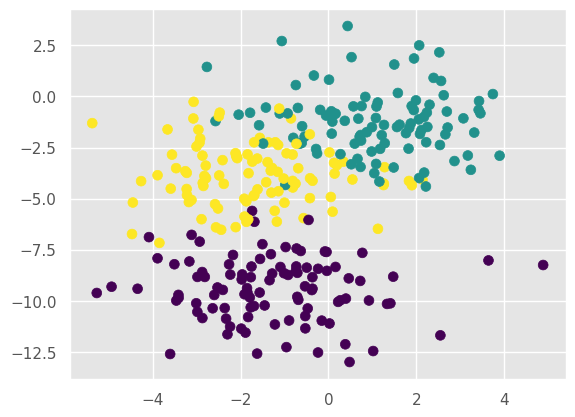

In [ ]:
# Exemplo com 03 clusters

X3, y3 = make_blobs(300, 2, centers=3, random_state=2, cluster_std=1.5)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='viridis');

###2.5 - Base de Dados make_s_curve (Curva S)

In [ ]:
from sklearn.datasets import make_s_curve

n_points = 2000
X, color = make_s_curve(n_points, random_state=0)

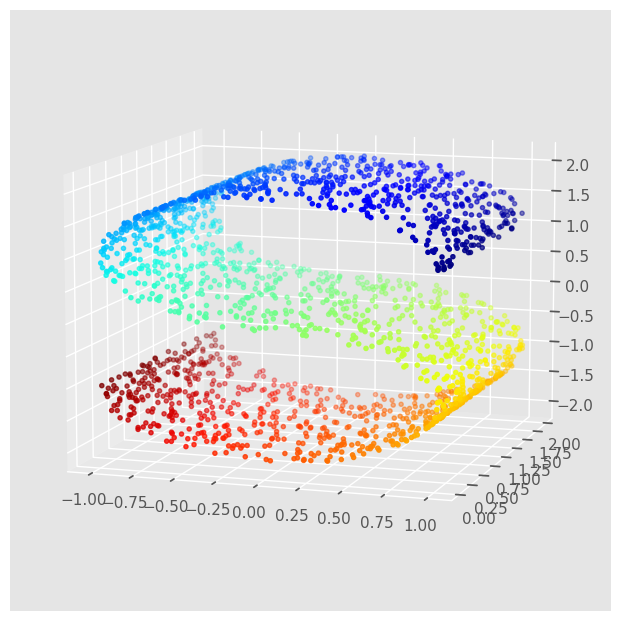

In [ ]:
fig = plt.figure(figsize=(45, 25))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet, s=9, lw=1)
ax.view_init(10, -72)

###2.6 - Base de Dados make_swiss_roll (Rolo Suiço)

In [ ]:
n_points = 2000
X, color = datasets.make_swiss_roll(n_points, random_state=0)

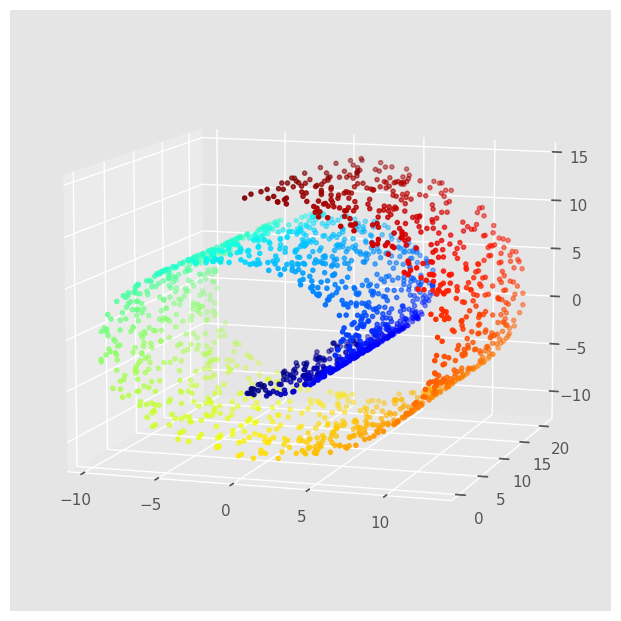

In [ ]:
fig = plt.figure(figsize=(45, 25))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.
cm.jet, s=9, lw=1)
ax.view_init(10, -72)

##3- Introdução à PCA

- Exemplo removido de: https://livebook.manning.com/book/mastering-unlabeled-data/chapter-3

In [ ]:
# Importação de Pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# carregamento da base Iris

iris_df = sns.load_dataset('iris')    # dataset Iris do pacote seaborn
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.shape

(150, 5)

In [ ]:
# Obtenção da matrix de características - Entradas do modelo

X_variables = iris_df.iloc[:,0:4]
X_variables


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Obtenção do vetor de targets - Saída do modelo
y_variable = iris_df.iloc[:,4]
y_variable

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
# Normalização das variáveis - remação de médias

sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

In [ ]:
# obtenção da Matriz de Covariância

covariance_matrix = np.cov(transformed_df.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
# Obtenção dos Autovalores e Autovetores da matriz de covariância

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.9380850501999953
0.9201649041624852
0.1477418210449476
0.020853862176463147


In [ ]:
# obtenção da PCA
pca = PCA()
pca = pca.fit(transformed_df)
pca

PCA()

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

([<matplotlib.axis.XTick at 0x7f2420a418d0>,
 [Text(0, 0, 'PC1'), Text(1, 0, 'PC2'), Text(2, 0, 'PC3'), Text(3, 0, 'PC4')])

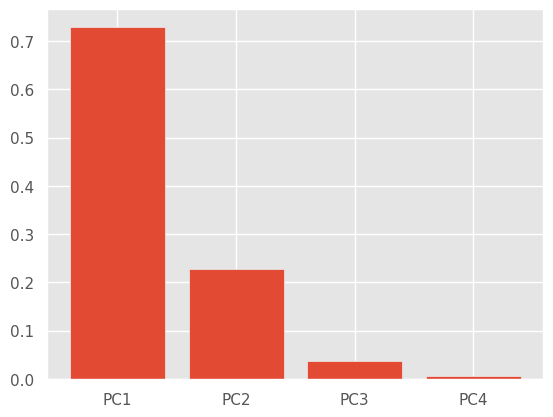

In [ ]:
# Cálculo dos componentes da PCA

varY = pca.explained_variance_ratio_
PC = ["PC1","PC2","PC3","PC4"]

height = varY
bars = PC

y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)


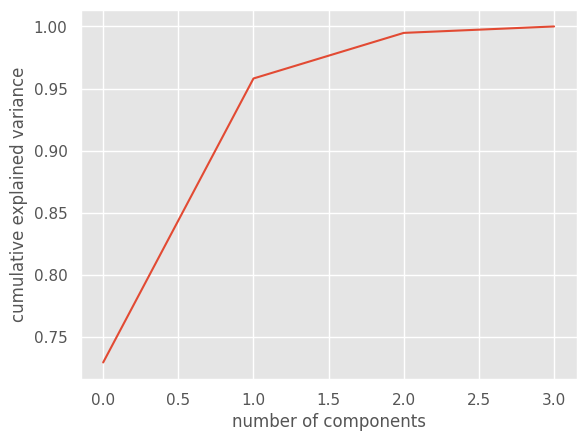

In [ ]:
# Cálculo do acumulado das contribuições de cada componente

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X_variables)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df['Species'] = iris_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})

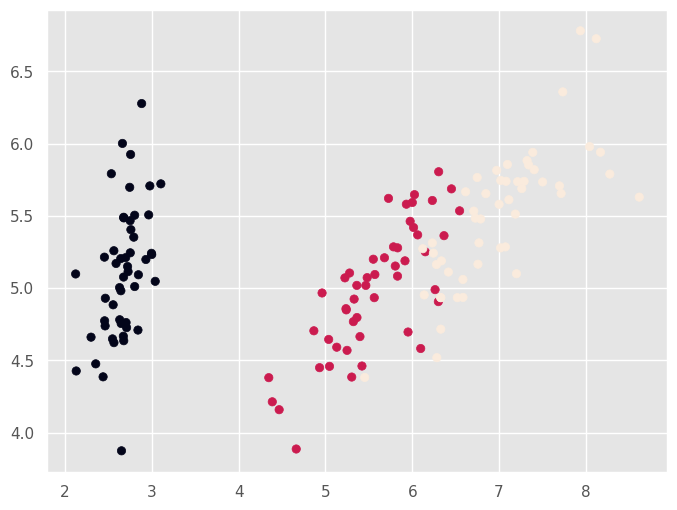

In [ ]:
# Plotando só as duas primeiras componentes
plt.figure(figsize=(8,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1],c=iris_df['Species'])
plt.show()





##4 - Terceira Lista de Simulação - Aplicação de PCA
###4.1 Questão 1
- Refaça o exemplo de aplicação de PCA para a base de dados Cancer ou base de dados Digits

###4.2 - Questão 2
- Refaça o exemplo de aplicação de PCA na base de dados Curva_S ou Rolo_Suiço.

### Tarefa:
- Grave um vídeo de até 5 minutos explicando a resolução dessas questões.